## Q-3.
Consider the ‘Blood Pressure Before’ and ‘Blood Pressure After’ columns from the
data and calculate the following

https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp=share_
1. Measure the dispersion in both and interpret the results.
2. Calculate mean and 5% confidence interval and plot it in a graph
3. Calculate the Mean absolute deviation and Standard deviation and interpret
the results.
4. Calculate the correlation coefficient and check the significance of it at 1% level of significance.

In [14]:
import pandas as pd

url = 'https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)

In [15]:
df.head()

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140


In [19]:
df.columns

Index(['Patient ID', ' Blood Pressure Before (mmHg)',
       ' Blood Pressure After (mmHg)'],
      dtype='object')

In [21]:
# Measure the dispersion in both and interpret the results.

disp_bp_before = df[' Blood Pressure Before (mmHg)'].var()
disp_bp_after = df[' Blood Pressure After (mmHg)'].var()

round(disp_bp_before,2),round(disp_bp_after,2)

(43.54, 47.44)

In [22]:
# Calculate mean and 5% confidence interval and plot it in a graph

from scipy.stats import t

mean_bp_before = df[' Blood Pressure Before (mmHg)'].mean()
mean_bp_after = df[' Blood Pressure After (mmHg)'].mean()

ci_bp_before = t.interval(0.95, len(df)-1, loc=mean_bp_before, scale=df[' Blood Pressure Before (mmHg)'].sem())
ci_bp_after = t.interval(0.95, len(df)-1, loc=mean_bp_after, scale=df[' Blood Pressure After (mmHg)'].sem())

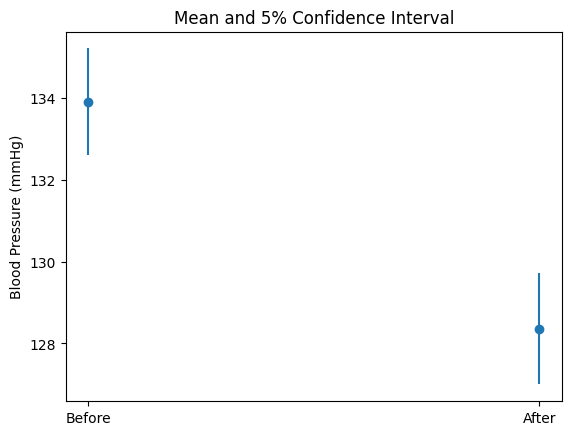

In [23]:
import matplotlib.pyplot as plt

plt.errorbar(['Before', 'After'], [mean_bp_before, mean_bp_after], yerr=[(ci_bp_before[1]-mean_bp_before), (ci_bp_after[1]-mean_bp_after)], fmt='o')
plt.ylabel('Blood Pressure (mmHg)')
plt.title('Mean and 5% Confidence Interval')
plt.show()

In [33]:
# Calculate the Mean absolute deviation and Standard deviation and interpret the results.
import warnings
warnings.filterwarnings('ignore')

mad_bp_before = df[' Blood Pressure Before (mmHg)'].mad()
mad_bp_after = df[' Blood Pressure After (mmHg)'].mad()

sd_bp_before = df[' Blood Pressure Before (mmHg)'].std()
sd_bp_after = df[' Blood Pressure After (mmHg)'].std()


mean_sd_df = pd.DataFrame({"Calculation": ["Mean Absolute Deviation","Standard Deviation"], "BP Before": [mad_bp_before, sd_bp_before],"BP After": [mad_bp_after, sd_bp_after] })
mean_sd_df.set_index("Calculation",inplace = True)
mean_sd_df

,BP Before,BP After
Calculation,,
Mean Absolute Deviation,5.711800,5.900000
Standard Deviation,6.598278,6.888022


In [46]:
# Calculate the correlation coefficient and check the significance of it at 1% level of significance.

from scipy.stats import pearsonr

corr_coef, p_value = pearsonr(df[' Blood Pressure Before (mmHg)'],df[' Blood Pressure After (mmHg)'])
print("Corr Coeff: ", corr_coef," , ", "P-value:", p_value)

# For 1% Significance level

if p_value < 0.01:
    print('The correlation coefficient is significant at the 1% level.')
else:
    print('The correlation coefficient is not significant at the 1% level.')

Corr Coeff:  0.9779485966556017  ,  P-value: 1.8097381433068578e-68
The correlation coefficient is significant at the 1% level.


## Q-6.

A pharmaceutical company is developing a drug that is supposed to reduce blood pressure. They conduct a clinical trial with 100 patients and record their blood pressure before and after taking the drug. The company wants to know if the change in blood pressure follows a normal distribution.

- https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp=share_

In [47]:
df.head()

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140


In [52]:
import seaborn as sns

df['change'] = df[' Blood Pressure Before (mmHg)'] - df[' Blood Pressure After (mmHg)']

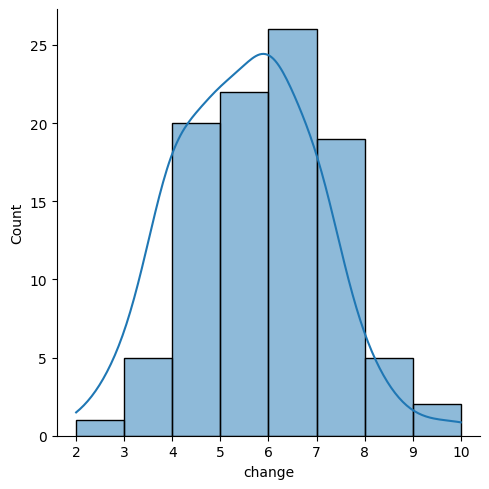

In [53]:
sns.displot(df['change'], kde = True)
plt.show()


In [60]:
print("Mean: ",df['change'].mean())
print("Median: ", df['change'].median())
print("Mode: ",df['change'].mode()[0])

Mean:  5.55
Median:  6.0
Mode:  6


By looking at the distribution plot and the mean, median and mode we can say that it follows the normal distribution

6